In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [5]:
states = ['Sunny','Rainy'] # len(states)= no of hidden states = 2
observations = ['Dry','Wet'] # len(observations) = no of observations = 2


In [6]:
# DEFINE THE INITIAL STATE DISTRIBUTION
state_probability = np.array([0.6,0.4])

# DEFINE THE STATE TRANSITION PROBABLITIES

transition_probability = np.array([
    [0.7,0.3],
    [0.3,0.7]
])

# DEFINE THE OBSERVATION LIKELYHOODS
emission_probability = np.array([
    [0.9,0.1],
    [0.2,0.8]
])

In [7]:
# DEFINE MODEL
model = hmm.CategoricalHMM(n_components=len(states))
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [9]:
# DEFINE THE SEQUENCE OF OBSERVATIONS
observations_sequence = np.array([0,1,0,1,0,0]).reshape(-1,1) # column matrix

In [10]:
# PREDICT THE MOST LIKELY SEQUENCE OF HIDDEN STATES
hidden_states = model.predict(observations_sequence)
hidden_states

array([0, 1, 1, 1, 0, 0])

In [11]:
log_probability, hidden_states = model.decode(observations_sequence, lengths=len(observations_sequence),
             algorithm='viterbi')
print("LOG Prob: ",log_probability)
print("MOST LIKELY HIDDEN STATES: ", hidden_states)

LOG Prob:  -6.360602626270058
MOST LIKELY HIDDEN STATES:  [0 1 1 1 0 0]


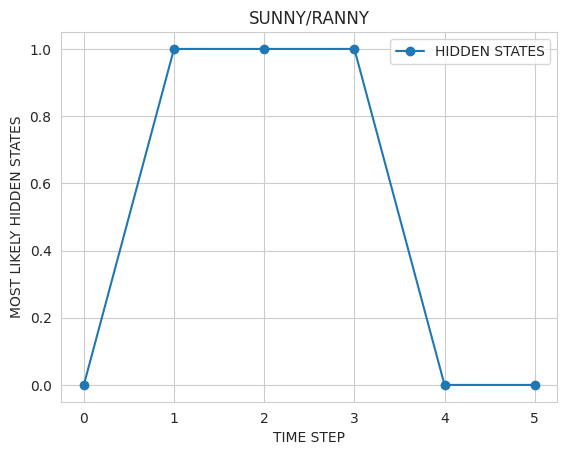

In [12]:
sns.set_style('whitegrid')
plt.plot(hidden_states, '-o', label = 'HIDDEN STATES')
plt.xlabel('TIME STEP')
plt.ylabel('MOST LIKELY HIDDEN STATES')
plt.title('SUNNY/RANNY')
plt.legend()
plt.show()

Most likely hidden states: [ 6 12 15 13 10 13 19 17 15 13 19]


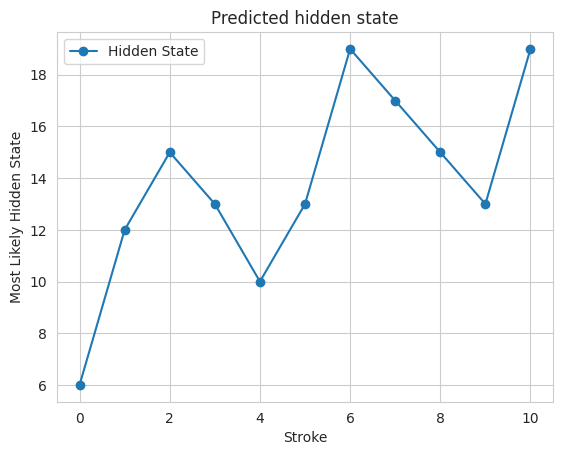

In [13]:

# Define the state space
states = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
		"N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
n_states = len(states)


# Define the observation space
observations = ["up", "down", "left", "right", "up-right", "down-right",
				"down-left", "up-left"]
n_observations = len(observations)


# Define the initial state distribution
start_probability = np.random.dirichlet(np.ones(26),size=(1))[0]

# Define the state transition probabilities
transition_probability = np.random.dirichlet(np.ones(26),size=(26))


# Define the observation likelihoods
emission_probability = np.random.dirichlet(np.ones(26),size=(26))

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the sequence of observations
observations_sequence = np.array([0, 1, 2, 1, 0, 1, 2, 3, 2, 1, 2]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Stroke')
plt.ylabel('Most Likely Hidden State')
plt.title("Predicted hidden state")
plt.legend()
plt.show()


Most likely hidden states: [0 1 2 2 3 3 3 3]


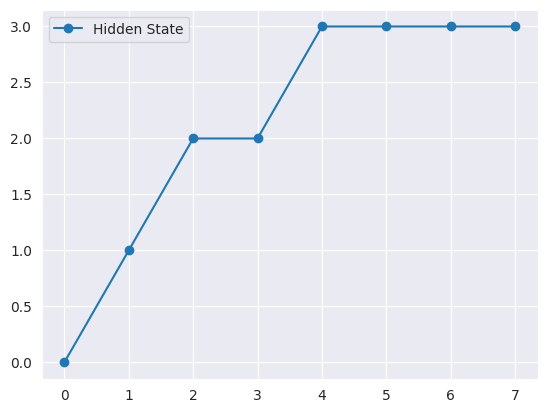

In [14]:

# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
									[0.0, 0.6, 0.4, 0.0],
									[0.0, 0.0, 0.6, 0.4],
									[0.0, 0.0, 0.0, 1.0]])

# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
								[0.4, 0.6],
								[0.6, 0.4],
								[0.3, 0.7]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()
